In [41]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import sklearn as sk
import pandas as pd
import seaborn as sns
sns.set_theme(style="darkgrid")
df = pd.read_csv('cartersvillelevels.csv')
print(df)

         DATE  GAUGE FT NGVD29  GAUGE M NGVD29   GAUGE M   ACTION    FLOOD  \
0     8/20/39            19.12        5.830000  6.925056  5.66928  7.19328   
1     1/22/37            20.25        6.170000  7.269480  5.66928  7.19328   
2    10/21/37            24.34        7.420000  8.516112  5.66928  7.19328   
3     4/26/37            27.73        8.450000  9.549384  5.66928  7.19328   
4     8/19/55            24.48        7.460000  8.558784  5.66928  7.19328   
..        ...              ...             ...       ...      ...      ...   
114    1/4/19            23.00        7.010000  8.107680  5.66928  7.19328   
115   2/25/19            21.27        6.480000  7.580376  5.66928  7.19328   
116   3/22/19            15.43        4.700000  5.800344  5.66928  7.19328   
117    2/4/20            20.20        6.160000  7.254240  5.66928  7.19328   
118  11/13/20            24.12        7.351776  8.449056  5.66928  7.19328   

     MODERATE  MAJOR     CLASS               TYPE    STORM     

ACTION      49
FLOOD       39
MODERATE    22
MAJOR        9
Name: CLASS, dtype: int64


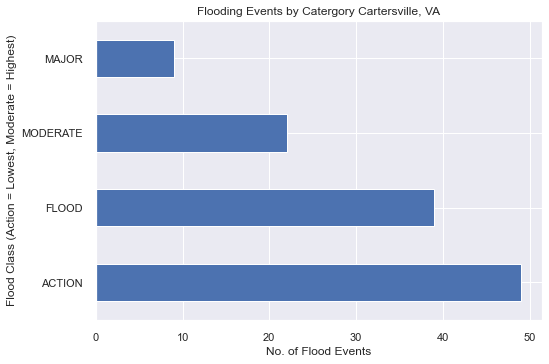

In [42]:
gauge = df['GAUGE M']
#separate the events by flood type
action_stage = df['ACTION']
flood_stage = df['FLOOD']
moderate_flood = df['MODERATE']
major = df['MAJOR']
date = df['DATE']
floodclass = df['CLASS']
floods = floodclass.value_counts().loc[['ACTION','FLOOD','MODERATE','MAJOR']].plot.barh()
plt.style.use('seaborn')
plt.xlabel("No. of Flood Events")
plt.ylabel("Flood Class (Action = Lowest, Moderate = Highest)")
plt.title("Flooding Events by Catergory Cartersville, VA")
print(floodclass.value_counts())

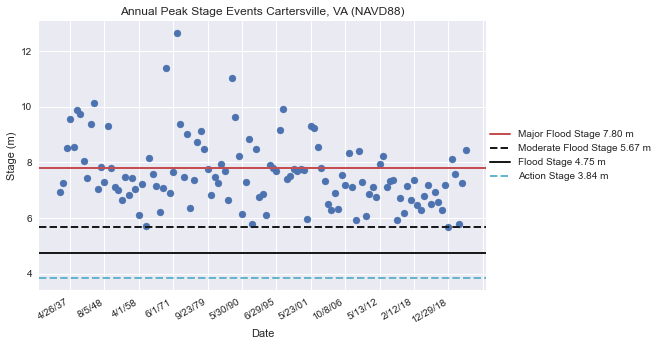

In [43]:
plt.style.use('seaborn')
#PLOTTING THE GAUGE, AND THEN THE FLOW ONE BY ONE
plt.scatter(date,gauge)
plt.gcf().autofmt_xdate()
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=10))
plt.gcf().autofmt_xdate()
plt.xlabel("Date")
plt.ylabel("Stage (m)")
plt.title('Annual Peak Stage Events Cartersville, VA (NAVD88)')
plt.axhline(y=3.84, color='c', linestyle='--',label='Action Stage 3.84 m',lw=2)
plt.axhline(y=4.75, color='k', linestyle='-',label='Flood Stage 4.75 m',lw=2)
plt.axhline(y=5.67, color='k', linestyle='--',label='Moderate Flood Stage 5.67 m',lw=2)
plt.axhline(y=7.80, color='r', linestyle='-',label='Major Flood Stage 7.80 m',lw=2)
handles, labels = plt.gca().get_legend_handles_labels()
order = [3,2,1,0]
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order],bbox_to_anchor=(1.0,0.5), loc="center left", borderaxespad=0)
#plt.legend(bbox_to_anchor=(1.0,0.5), loc="center left", borderaxespad=0)

Text(0.5, 1.0, 'Events with "ACTION" designation (NAVD88)')

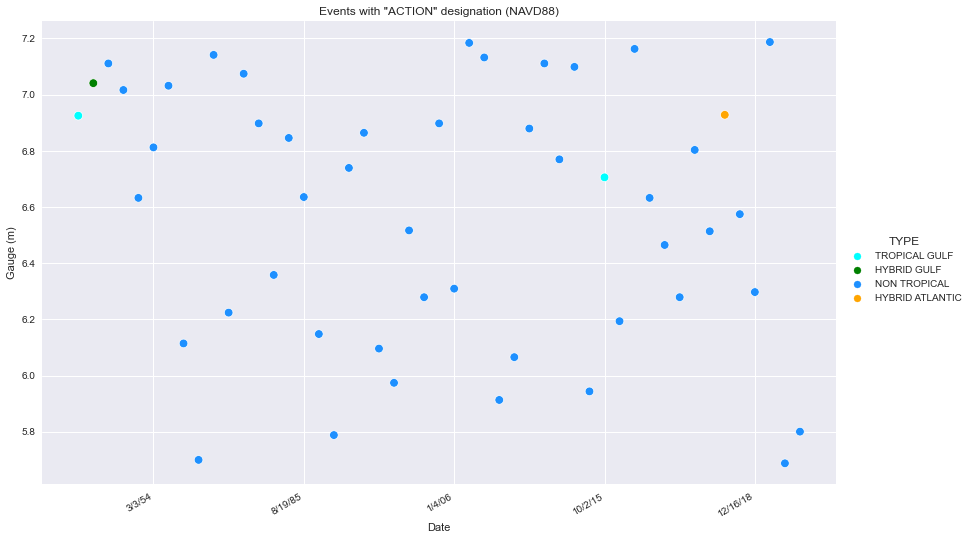

In [44]:
import matplotlib.dates as mdates
#Turn this into a scatter plot - only individual data points
floods=df[df['CLASS'] == 'ACTION']
del floods["FLOOD"]
del floods["MODERATE"]
del floods["MAJOR"]
plt.style.use('seaborn')
#PLOTTING THE GAUGE, AND THEN THE FLOW ONE BY ONE
gauge = floods['GAUGE M']
dates = floods['DATE']
color_dict = dict({'TROPICAL GULF':'cyan',
                  'NON TROPICAL':'dodgerblue',
                  'TROPICAL ATLANTIC':'red',
                  'HYBRID GULF': 'green',
                   'HYBRID ATLANTIC': 'orange'})
sns.relplot(x='DATE', y='GAUGE M', hue = "TYPE", data=floods,palette=color_dict,height=8.27, aspect=11.7/8.27,s=75, legend='full')
#plt.scatter(dates,gauge, color = 'blue')
plt.gcf().autofmt_xdate()
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=10))
plt.gcf().autofmt_xdate()
plt.xlabel("Date")
plt.ylabel("Gauge (m)")
plt.title('Events with "ACTION" designation (NAVD88)')
#print(floods)

Text(0.5, 1.0, 'Events with "FLOOD" designation,(NAVD88)')

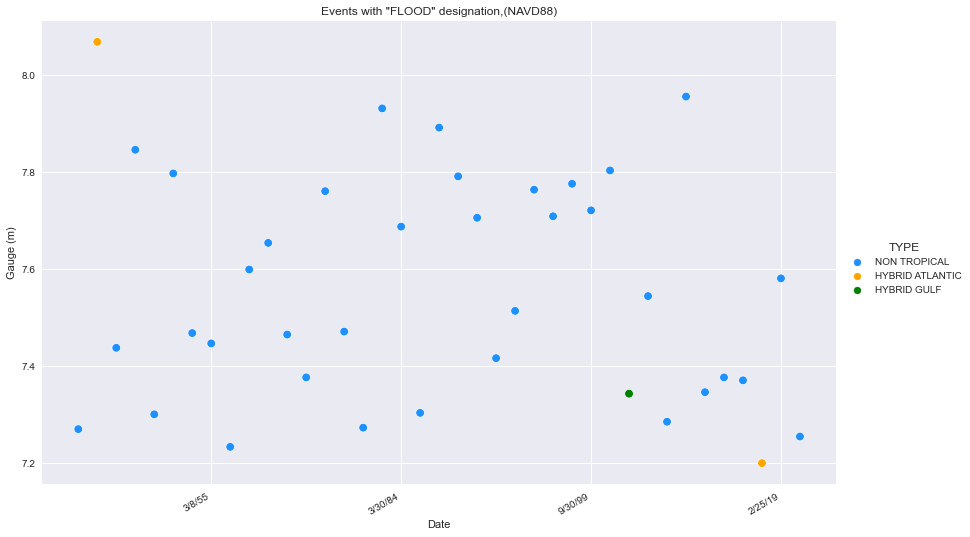

In [45]:
import matplotlib.dates as mdates
#Turn this into a scatter plot - only individual data points
floods=df[df['CLASS'] == 'FLOOD']
del floods["ACTION"]
del floods["MODERATE"]
del floods["MAJOR"]
plt.style.use('seaborn')
#PLOTTING THE GAUGE, AND THEN THE FLOW ONE BY ONE
gauge = floods['GAUGE M']
#flow = floods['FLOW CMS']
dates = floods['DATE']
color_dict = dict({'TROPICAL GULF':'cyan',
                  'NON TROPICAL':'dodgerblue',
                  'TROPICAL ATLANTIC':'red',
                  'HYBRID GULF': 'green',
                   'HYBRID ATLANTIC': 'orange'})
sns.relplot(x='DATE', y='GAUGE M', hue = "TYPE", data=floods,palette=color_dict,height=8.27, aspect=11.7/8.27,s=75, legend='full')
#plt.scatter(dates,gauge, color = 'red')
plt.gcf().autofmt_xdate()
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=10))
plt.gcf().autofmt_xdate()
plt.xlabel("Date")
plt.ylabel("Gauge (m)")
plt.title('Events with "FLOOD" designation,(NAVD88)')
#print(floods)

Text(0.5, 1.0, 'Events with "MODERATE" designation, (NAVD88)')

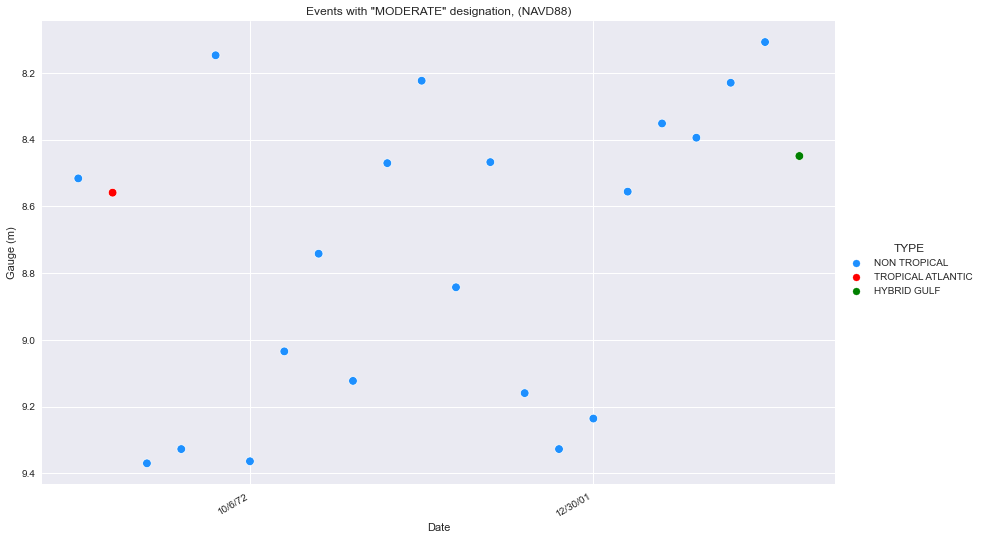

In [46]:
import matplotlib.dates as mdates
#Turn this into a scatter plot - only individual data points
floods=df[df['CLASS'] == 'MODERATE']
floods["ACTION"]
floods["FLOOD"]
#del floods["MODERATE STAGE"]
floods["MAJOR"]
plt.style.use('seaborn')
#PLOTTING THE GAUGE, AND THEN THE FLOW ONE BY ONE
gauge = floods['GAUGE M']
dates = floods['DATE']

color_dict = dict({'TROPICAL GULF':'cyan',
                  'NON TROPICAL':'dodgerblue',
                  'TROPICAL ATLANTIC':'red',
                  'HYBRID GULF': 'green',
                   'HYBRID ATLANTIC': 'orange'})
sns.relplot(x='DATE', y='GAUGE M', hue = "TYPE", data=floods,palette=color_dict,height=8.27, aspect=11.7/8.27,s=75, legend='full')
plt.gcf().autofmt_xdate()
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=10))
plt.gca().invert_yaxis()
plt.title('Type of Flood Event Cartersville, VA')
#plt.scatter(dates,gauge, color = 'blue')
plt.gcf().autofmt_xdate()
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=10))
plt.gcf().autofmt_xdate()
plt.xlabel("Date")
plt.ylabel("Gauge (m)")
plt.title('Events with "MODERATE" designation, (NAVD88)')

Text(0.5, 1.0, 'Type of Flood Event Cartersville, VA')

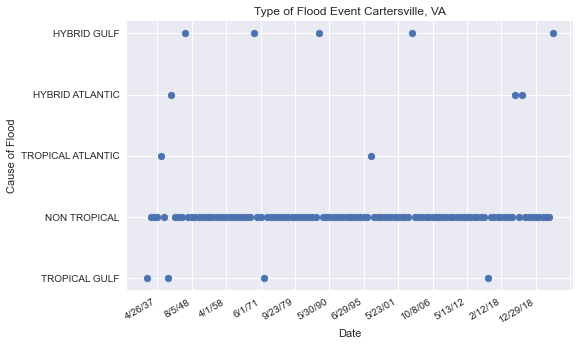

In [47]:
floodclass =df["CLASS"]
date = df['DATE']
contributor = df['TYPE'].astype(str)
plt.style.use('seaborn')
plt.scatter(date,contributor)
#plt.yticks(['ACTION','FLOOD','MODERATE','MAJOR'])
plt.gcf().autofmt_xdate()
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval = 10))
plt.gcf().autofmt_xdate()
plt.xlabel("Date")
plt.ylabel("Cause of Flood")
plt.title('Type of Flood Event Cartersville, VA')


Text(0.5, 1.0, 'Type of Flood Event Cartersville, VA')

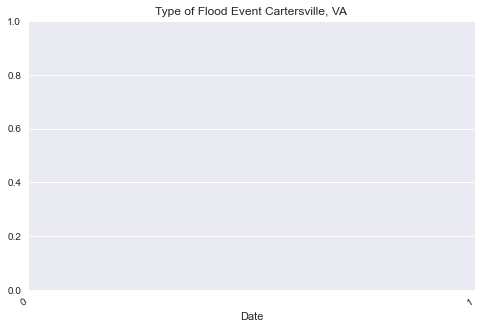

In [48]:
import seaborn as sns
floodclass =df["CLASS"]
date = df['DATE']
contributor = df['TYPE']
plt.style.use('seaborn')
#sns.catplot(x= date, y=floodclass, hue = contributor, data=df)
#plt.scatter(date,floodclass)

y_ticks_labels = ['NONE','ACTION','FLOOD','MODERATE','MAJOR']
plt.gcf().autofmt_xdate()
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=10))
plt.gcf().autofmt_xdate()
plt.xlabel("Date")
#plt.ylabel("Type of Flood"
plt.title('Type of Flood Event Cartersville, VA')

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")


In [50]:
data = pd.read_csv('cartersvillelevels.csv')
print(df["CLASS"])

0        ACTION
1         FLOOD
2      MODERATE
3         MAJOR
4      MODERATE
         ...   
114    MODERATE
115       FLOOD
116      ACTION
117       FLOOD
118    MODERATE
Name: CLASS, Length: 119, dtype: object


Text(0.5, 1.0, 'Type of Flood Event Cartersville, VA')

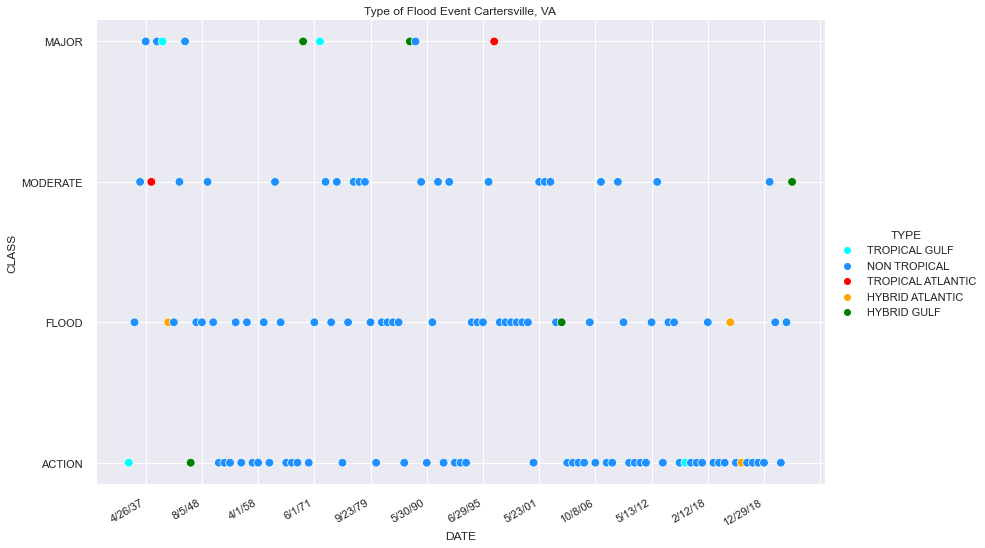

In [51]:
color_dict = dict({'TROPICAL GULF':'cyan',
                  'NON TROPICAL':'dodgerblue',
                  'TROPICAL ATLANTIC':'red',
                  'HYBRID GULF': 'green',
                   'HYBRID ATLANTIC': 'orange'})
sns.relplot(x="DATE", y='CLASS', hue = "TYPE", data=data,palette=color_dict,height=8.27, aspect=11.7/8.27,s=75, legend='full')
plt.gcf().autofmt_xdate()
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=10))
plt.gca().invert_yaxis()
plt.title('Type of Flood Event Cartersville, VA')
